In [1]:
# trying to reproduce table from DJ paper, but using OR classes from GMM

from numpy import genfromtxt 
import pickle
import matplotlib.colors as colors
plt.style.use('bmh') #ggplot')
#plt.style.use('fivethirtyeight') #ggplot')

def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

with open('/home/dudavid/projects/dsd/dj/OceanClustering/Objects/PCA_object.pkl','rb') as input:
        pca_object = pickle.load(input)
        pcavar = pca_object.explained_variance_ratio_
print("# PCs used to explain ",np.sum(pcavar*100),"% of variance: ",np.size(pcavar))
print("variance explained by PCs: ",np.round(pcavar*100,2))
#print("cumsum varex: ",np.cumsum(pcavar*100))
# WILL PRINT MOST RECENT RUN'S PCA VARIANCE EXPLAINED DATA

nc = 6 #10 # number of classes (IF NOT CORRECT (with what's been run) THIS WILL GIVE BAD RESULTS)
dtyp = 'raw' # raw or norm
inty = 'MSb3' # input data type -- extra s for more smoothing (n=5 instead of n=3)

# PCs used to explain  99.82652865330007 % of variance:  29
variance explained by PCs:  [43.11 14.92  7.43  6.04  4.75  4.15  3.27  2.75  2.24  1.93  1.52  1.24
  1.07  0.93  0.79  0.65  0.55  0.47  0.37  0.34  0.28  0.23  0.19  0.16
  0.13  0.1   0.09  0.07  0.06]


In [2]:

#el = file_len("Data_store/Probabilities/Post_prob_class["+str(0)+"].csv")-1
el = file_len("Data_store/Probabilities/save."+str(nc)+"."+inty+dtyp+"."+str(0)+".csv")-1
print('total points: ',el)
post_probs = np.zeros([nc,el])
for n in range(nc):
    filename = "Data_store/Probabilities/save."+str(nc)+"."+inty+dtyp+"."+str(n)+".csv" 
            # more permanent filename for current standard, VS4
    #filename = "Data_store/Probabilities/Post_prob_class["+str(n)+"].csv" # JUST LATEST RUN!!!!
    class_data = genfromtxt(filename, delimiter=',',skip_header=1)
    if n==0:
        lons = class_data[:,0]
        lats = class_data[:,1]
    post_probs[n,:] = class_data[:,2] # just dump post probs into array
    
most_prob = np.array([np.where(post_probs[:,x]==np.max(post_probs[:,x]))[0][0] for x in range(el)]) # indices
hghst_prob = np.array([ post_probs[most_prob[x],x] for x in range(el)])
#print(hghst_prob[0:10])
print(np.shape(hghst_prob))


total points:  92116
(92116,)


In [3]:
#class1 = [most_prob==0]
sp = []
for n in range(nc):
    print("tot points in class "+str(n+1)+": ",np.size(most_prob[most_prob==n]))#,\
          #100*np.size(most_prob[most_prob==n])/np.size(most_prob))
    sp.append(str(np.round(100*np.size(most_prob[most_prob==n])/np.size(most_prob), 1)))

print(sp)

tot points in class 1:  14884
tot points in class 2:  21389
tot points in class 3:  5220
tot points in class 4:  12588
tot points in class 5:  17186
tot points in class 6:  20849
['16.2', '23.2', '5.7', '13.7', '18.7', '22.6']


In [4]:
# read in original input data
nb = 80 # number of bins (75, 65, etc)
shrnk = False
idir = "/home/dudavid/projects/dsd/dj/data/"
inty = 'MSs3' # input data type -- can be different from the above...
if shrnk:
    nin_file = idir+"shrnk.normallcts"+inty+"."+str(nb)+".npy"
    in_file =     idir+"shrnk.rallcts"+inty+"."+str(nb)+".npy" # uses RAW (not vol-weighted) data
    inrr = np.load(idir+"shrnk.allrrd"+inty+".npy")
    indm = np.load(idir+"shrnk.alldmd"+inty+".npy")
    inla = np.load(idir+"shrnk.alllatd"+inty+".npy")
    inlo = np.load(idir+"shrnk.alllond"+inty+".npy")
    innw = np.log10(np.load(idir+"shrnk.allnwd"+inty+".npy"))
    inku = np.load(idir+"shrnk.allkud"+inty+".npy")
    inka = np.load(idir+"shrnk.allkad"+inty+".npy")
else:
    nin_file = idir+"normallcts"+inty+"."+str(nb)+".npy"
    in_file =  idir+"rallcts"+inty+"."+str(nb)+".npy"
    inrr = np.load(idir+"allrrd"+inty+".npy")
    indm = np.load(idir+"alldmd"+inty+".npy")
    inla = np.load(idir+"alllatd"+inty+".npy")
    inlo = np.load(idir+"alllond"+inty+".npy")
    innw = np.log10(np.load(idir+"allnwd"+inty+".npy"))
    inku = np.load(idir+"allkud"+inty+".npy")
    inka = np.load(idir+"allkad"+inty+".npy")
    
nindata = np.load(nin_file)
#print(np.shape(nindata))
indata = np.load(in_file)
#print(np.shape(indata))
print(np.shape(lons))
print(np.shape(inku))
print(info(inku))

print(info(lons - inlo))  # just a check we're looking at same points!

(92116,)
(92116,)
['5.56E+0', '6.18E+1', '2.61E+1', '9.31E+0']
['0.00E+2', '0.00E+2', '0.00E+2', '0.00E+2']


In [5]:
# 2d histogram of Dm and Nw from oceanrain:
#his = plt.hist2d(indm, innw, bins=[32,24], range=[[0.5,4],[1,6]])
# output structure is [array of 2d histogram, array of x [dm] bins, array of y [nw] bins, image]
#plt.show()
#grdplt(np.rot90(his[0][::-1,:],3), his[1][0],his[1][-1], his[2][0],his[2][-1], 1, np.max(his[0]), 1)

# calculate posterior probability histogram (a la Jones Table 2)

In [6]:
mean_profs = np.zeros([nc,nb])
mean_profsn = np.zeros([nc,nb])
std_profs = np.zeros([nc,nb])
std_profsn = np.zeros([nc,nb])
aitchb = np.array([0,0.5,.75,.9,.99,1.0])
phist = np.zeros([len(aitchb)-1,nc])
for n in range(nc):
    class_n = [most_prob==n][0]
    # construct mean profile and standard deviation at each level
    mean_profs[n,:] = np.mean(indata[:,class_n], axis=1) # NOT NORMALIZED DATA
    std_profs[n,:]  = np.std(indata[:,class_n], axis=1)
    # then the same but using standardized size PDFs
    mean_profsn[n,:] = np.mean(nindata[:,class_n], axis=1) #  USING NORMALIZED DATA
    std_profsn[n,:]  = np.std(nindata[:,class_n], axis=1)
    phist[:,n] = np.histogram(hghst_prob[class_n], bins=aitchb )[0] / np.size(inrr[class_n])
    
print('Histogram intervals: ',aitchb)
print(np.round(phist*100,1))

Histogram intervals:  [0.   0.5  0.75 0.9  0.99 1.  ]
[[ 0.   0.   0.   0.   0.   0. ]
 [ 2.8  4.   2.9  4.2  4.7  4.6]
 [ 2.3  4.4  2.3  3.5  4.4  4.8]
 [ 5.6  9.8  4.9  7.7 10.3 10.5]
 [89.3 81.8 89.9 84.6 80.6 80.2]]


# plot histograms of RR, Dm, Nw, sim. reflectivity

% of total RR:  1.1
% of total RR:  4.26
% of total RR:  39.52
% of total RR:  29.53
% of total RR:  16.22
% of total RR:  9.37


/home/dudavid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


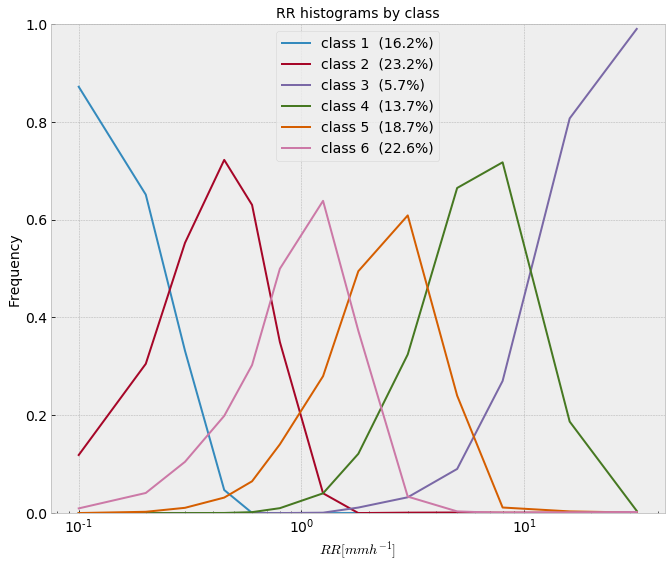

['1.1', '4.3', '39.5', '29.5', '16.2', '9.4']


In [7]:
bins = [0.01,.05,.1,.2,.3,.45,.6,.8,1.25,1.8,3,5,8,16,32,64]#,256]
rhist = np.zeros([len(bins)-1,nc])
arhist = np.zeros([len(bins)-1])
fig = plt.figure(figsize=[11,9])
frac_rain = np.zeros([nc])
sfr=[]
for n in range(nc):
    class_n = [most_prob==n][0]
    if n==0: arhist[:] = np.histogram(inrr,bins=bins)[0]
    rhist[:,n] = np.histogram(inrr[class_n],bins=bins)[0] / arhist[:] #/np.size(inrr[class_n])
    plt.plot(bins[:-1],rhist[:,n],label='class '+str(n+1)+'  ('+sp[n]+'%)')
    print("% of total RR: ",np.round(100*np.sum(inrr[class_n])/np.sum(inrr),2))
    frac_rain[n] = np.sum(inrr[class_n])/np.sum(inrr) 
    sfr.append( str( np.round(frac_rain[n]*100, 1) ) )
    
plt.title("RR histograms by class",fontsize=14)
plt.xlabel(r"$RR [mm h^{-1}]$",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0.0,1.0])
plt.legend(fontsize=14)
plt.xscale('log')
plt.show() 
print(sfr)

14884
21389
5220
12588
17186
20849


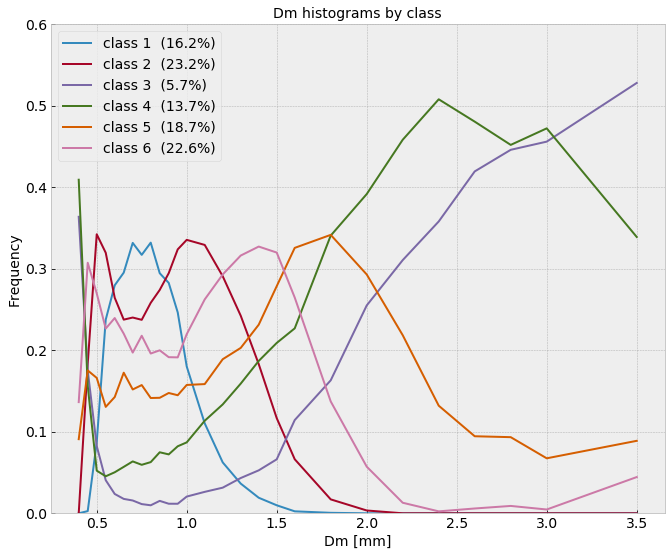

In [8]:
dbins = [.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1,1.1,1.2,1.3,1.4,1.5,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3,3.5,4]#,256]
dhist = np.zeros([len(dbins)-1,nc])
fig = plt.figure(figsize=[11,9])
for n in range(nc):
    if n==0: adhist = np.histogram(indm,bins=dbins)[0]
    class_n = [most_prob==n][0]
    print(np.size(indm[class_n]))
    dhist[:,n] = np.histogram(indm[class_n],bins=dbins)[0] / adhist #/np.size(indm[class_n])
    plt.plot(dbins[:-1],dhist[:,n],label='class '+str(n+1)+'  ('+sp[n]+'%)')
    
plt.title("Dm histograms by class",fontsize=14)
plt.xlabel("Dm [mm]",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0.0,0.6])
plt.legend(fontsize=14)
plt.show() 

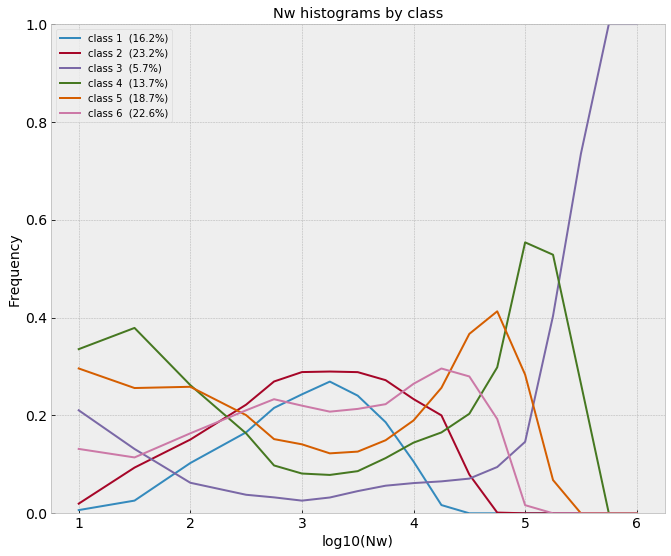

In [9]:
nbins = [1,1.5,2.0,2.5,2.75,3.0,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.5]
nhist = np.zeros([len(nbins)-1,nc])
fig = plt.figure(figsize=[11,9])
for n in range(nc):
    if n == 0: anhist = np.histogram(innw,bins=nbins)[0]
    class_n = [most_prob==n][0]
    nhist[:,n] = np.histogram(innw[class_n],bins=nbins)[0] / anhist #/np.size(innw[class_n])
    plt.plot(nbins[:-1],nhist[:,n],label='class '+str(n+1)+'  ('+sp[n]+'%)')
    
plt.legend(fontsize=14)
plt.title("Nw histograms by class",fontsize=14)
plt.xlabel("log10(Nw)",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0.0,1.0])
plt.legend()
plt.title("Nw histograms by class")
#plt.yscale('log')
plt.show() 

[ 5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35. 37. 39.
 41. 43. 45. 47. 49. 51. 53. 55.]


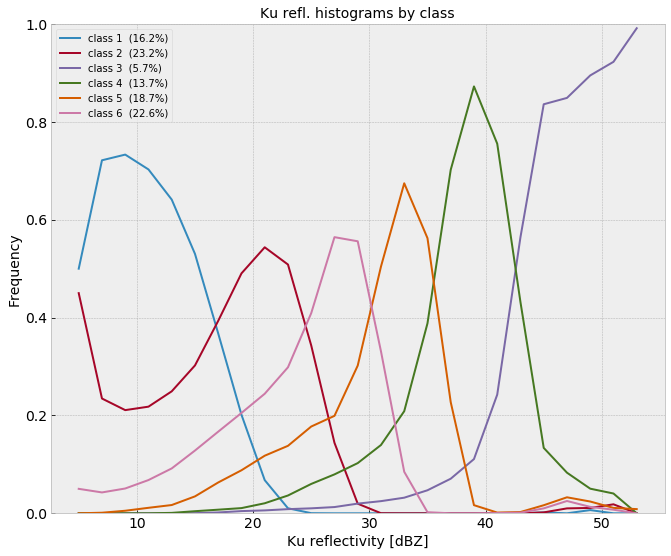

In [10]:
nbins = np.linspace(5,55,26)
print(nbins)
nhist = np.zeros([len(nbins)-1,nc])
fig = plt.figure(figsize=[11,9])
for n in range(nc):
    if n == 0: anhist = np.histogram(inku,bins=nbins)[0]
    class_n = [most_prob==n][0]
    nhist[:,n] = np.histogram(inku[class_n],bins=nbins)[0] / anhist #/np.size(innw[class_n])
    plt.plot(nbins[:-1],nhist[:,n],label='class '+str(n+1)+'  ('+sp[n]+'%)')
    
plt.legend(fontsize=14)
plt.title("Ku refl. histograms by class",fontsize=14)
plt.xlabel("Ku reflectivity [dBZ]",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0.0,1.0])
plt.legend()
#plt.yscale('log')
plt.show() 

In [11]:
#nbins = np.linspace(5,55,26)
#nhist = np.zeros([len(nbins)-1,nc])
#fig = plt.figure(figsize=[11,9])
#for n in range(nc):
#    if n == 0: anhist = np.histogram(inka,bins=nbins)[0]
#    class_n = [most_prob==n][0]
#    nhist[:,n] = np.histogram(inka[class_n],bins=nbins)[0] / anhist #/np.size(innw[class_n])
#    plt.plot(nbins[:-1],nhist[:,n],label='class '+str(n+1)+'  ('+sp[n]+'%)')
#    
#plt.legend(fontsize=14)
#plt.title("Ka refl. histograms by class",fontsize=14)
#plt.xlabel("Ka reflectivity [dBZ]",fontsize=14)
#plt.ylabel("Frequency",fontsize=14)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.ylim([0.0,1.0])
##plt.yscale('log')
#plt.show() 

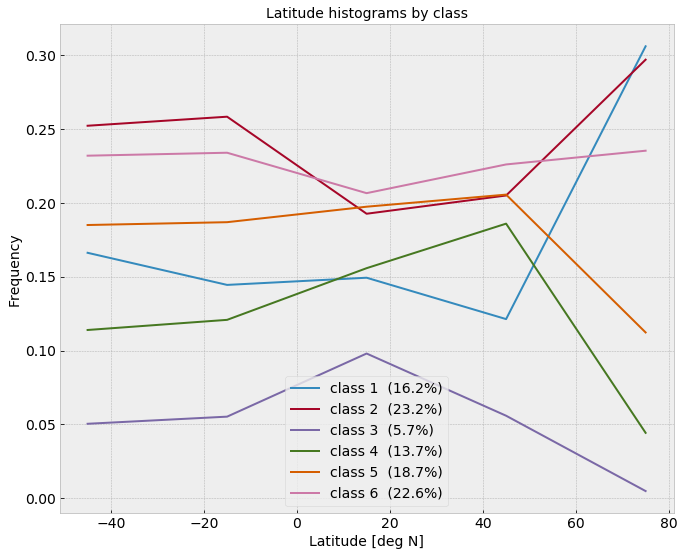

In [12]:
wid = 30
lbins = np.array([-60+x*wid for x in range(round((80--60)/wid)+1)])
lhist = np.zeros([len(lbins)-1,nc])
fig = plt.figure(figsize=[11,9])
for n in range(nc):
    if n==0: alh = np.histogram(inla,bins=lbins)[0]
    class_n = [most_prob==n][0]
    lhist[:,n] = np.histogram(inla[class_n],bins=lbins)[0] / alh #/np.size(innw[class_n])
    plt.plot(lbins[:-1]+wid*.5,lhist[:,n],label='class '+str(n+1)+'  ('+sp[n]+'%)')
    
plt.legend(fontsize=14)
plt.title("Latitude histograms by class",fontsize=14)
plt.xlabel("Latitude [deg N]",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim([0.0,1.0])
plt.show() 

['0.39', '0.77', '1.27', '1.9', '2.7', '3.73', '5.05', '6.73']


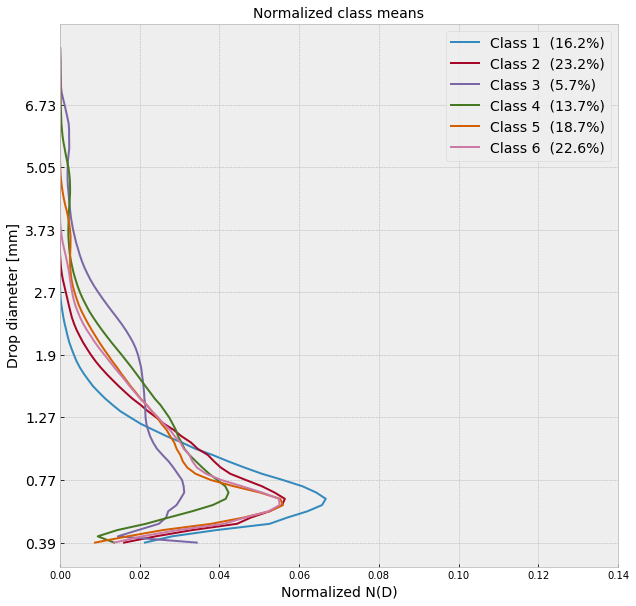

In [13]:
bn = np.load('/home/dudavid/projects/dsd/oceanrain_binsizes.npy')[12:] # skip first 12

y = np.arange(nb) #bn[:nb]
ysb = np.round(len(y) / 8).astype(int) # number y ticks
strbs = [ str(bn[x]) for x in range(nb)]
print(strbs[::ysb])

p = plt.figure(figsize=[10,10])
lwr = np.zeros([nc,nb])
upr = np.zeros([nc,nb])
for n in range(nc):
    lwr[n,:] = mean_profsn[n,:]-std_profsn[n,:]
    upr[n,:] = mean_profsn[n,:]+std_profsn[n,:]
    lwr[n,:][lwr[n,:] < 0] = 0.0
    
    plt.plot(mean_profsn[n,:], y, label='Class '+str(n+1)+'  ('+sp[n]+'%)')
    
plt.yticks(y[::ysb],strbs[::ysb],fontsize=14)
plt.ylabel("Drop diameter [mm]",fontsize=14)
plt.xlabel("Normalized N(D)",fontsize=14)
#plt.xlabel(r"Normalized N(D) $[mm^{-1} m^{-3}]$",fontsize=14)
plt.legend(fontsize=14)
plt.title("Normalized class means",fontsize=14)
plt.xlim([0,.14])
plt.show()


['0.39', '0.77', '1.27', '1.9', '2.7', '3.73', '5.05', '6.73']
(80, 435)
(80, 1049)
(80, 1433)
(80, 1738)


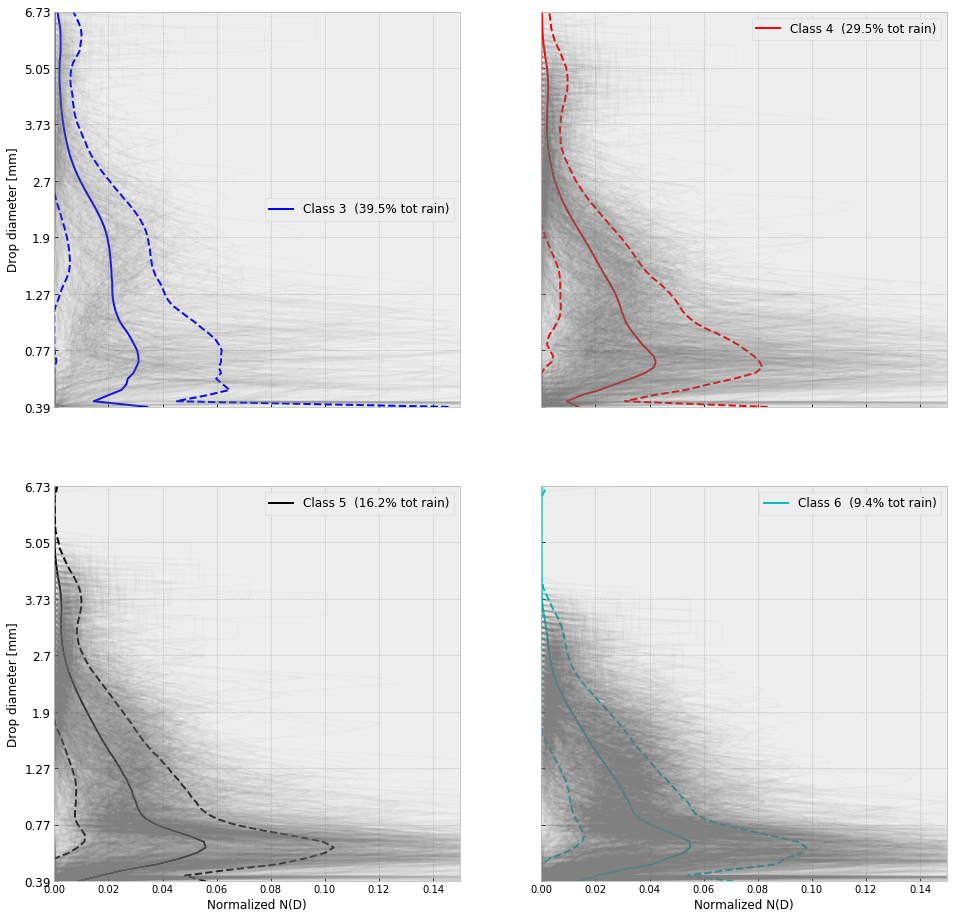

In [14]:
# plot the mean and std of weighted N for top x rain classes
trc = 4 # top rain classes
order = np.argsort(frac_rain)[::-1] # indices for top rain classes percentage-wise 

y = np.arange(nb) #bn[:nb]
#fig, ax1 = plt.subplots(2,2) # figsize=[9,9])
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex='col', sharey='row', figsize=[16,16])
ysb = np.round(len(y) / 8).astype(int) # number y ticks
strbs = [ str(bn[x]) for x in range(nb)]
print(strbs[::ysb])

lwr = np.zeros([trc,nb])
upr = np.zeros([trc,nb])
mpr = np.zeros([trc,nb])
for n in range(trc):
    mpr[n,:] = mean_profsn[order[n],:]
    lwr[n,:] = mpr[n,:]-std_profsn[order[n],:]
    upr[n,:] = mpr[n,:]+std_profsn[order[n],:]
    lwr[n,:][lwr[n,:] < 0] = 0.0
    
ax1.plot(mpr[0,:], y, 'b', label='Class '+str(order[0]+1)+'  ('+sfr[order[0]]+'% tot rain)')
ax1.plot(upr[0,:], y, 'b--')
ax1.plot(lwr[0,:], y, 'b--')
howmany = 12 # i.e. plot every _th profile
alf = 0.03 # alpha value for individual PDF lines
subset = nindata[:,[most_prob==order[0]][0]]
for d in range(int(np.ma.size(subset, axis=1)/howmany)):
    ax1.plot(subset[:,d*howmany], y, lw = 1.5, alpha = alf, color = 'grey')
print(np.shape(subset[:,::howmany]))

ax2.plot(mpr[1,:], y, 'r', label='Class '+str(order[1]+1)+'  ('+sfr[order[1]]+'% tot rain)')
ax2.plot(upr[1,:], y, 'r--')
ax2.plot(lwr[1,:], y, 'r--')
subset = nindata[:,[most_prob==order[1]][0]]
for d in range(int(np.ma.size(subset, axis=1)/howmany)):
    ax2.plot(subset[:,d*howmany], y, lw = 1.5, alpha = alf, color = 'grey')
print(np.shape(subset[:,::howmany]))
ax3.plot(mpr[2,:], y, 'k', label='Class '+str(order[2]+1)+'  ('+sfr[order[2]]+'% tot rain)')
ax3.plot(upr[2,:], y, 'k--')
ax3.plot(lwr[2,:], y, 'k--')
subset = nindata[:,[most_prob==order[2]][0]]
for d in range(int(np.ma.size(subset, axis=1)/howmany)):
    ax3.plot(subset[:,d*howmany], y, lw = 1.5, alpha = alf, color = 'grey')
print(np.shape(subset[:,::howmany]))
ax4.plot(mpr[3,:], y, 'c', label='Class '+str(order[3]+1)+'  ('+sfr[order[3]]+'% tot rain)')
ax4.plot(upr[3,:], y, 'c--')
ax4.plot(lwr[3,:], y, 'c--')
subset = nindata[:,[most_prob==order[3]][0]]
for d in range(int(np.ma.size(subset, axis=1)/howmany)):
    ax4.plot(subset[:,d*howmany], y, lw = 1.5, alpha = alf, color = 'grey')
print(np.shape(subset[:,::howmany]))

ax1.set_yticks(y[::ysb])
ax1.set_yticklabels(strbs[::ysb],fontsize=12)
ax1.set_ylabel("Drop diameter [mm]",fontsize=12)
ax3.set_xlabel("Normalized N(D)",fontsize=12)
ax4.set_xlabel("Normalized N(D)",fontsize=12)
ax3.set_yticks(y[::ysb])
ax3.set_yticklabels(strbs[::ysb],fontsize=12)
ax3.set_ylabel("Drop diameter [mm]",fontsize=12)
ax3.set_xlim([0,.15])
ax4.set_xlim([0,.15])
ax1.set_ylim([0,70])
ax3.set_ylim([0,70])
#plt.xscale('log')
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
ax3.legend(fontsize=12)
ax4.legend(fontsize=12)
plt.show()

['0.39', '0.77', '1.27', '1.9', '2.7', '3.73', '5.05', '6.73']


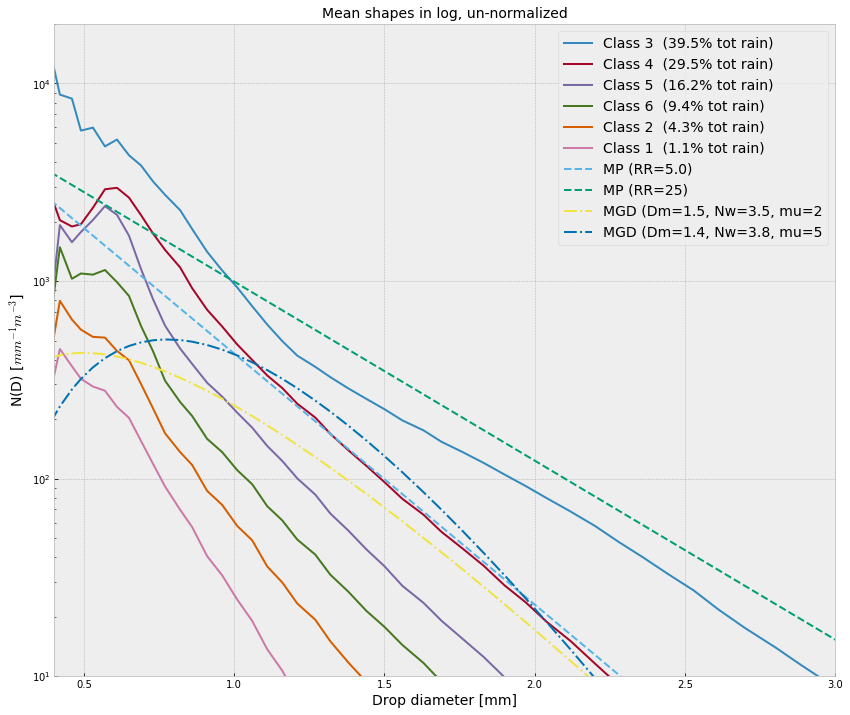

In [15]:
# plot the means for top x rain classes
#  Now in log space with non-normalized PDF shapes
trc = nc # top rain classes
order = np.argsort(frac_rain)[::-1] # indices for top rain classes percentage-wise 

y = np.arange(nb) #bn[:nb]
ysb = np.round(len(y) / 8).astype(int) # number y ticks
strbs = [ str(bn[x]) for x in range(nb)]
mpy = np.array([float(bn[x]) for x in range(nb)]) # for calculating theoretical DSDs below
print(strbs[::ysb])

lwr = np.zeros([trc,nb])
upr = np.zeros([trc,nb])
mpr = np.zeros([trc,nb]) # mean profiles
for n in range(trc):
    mpr[n,:] = mean_profs[order[n],:] # same as above but NOT using normalized shapes
    lwr[n,:] = mpr[n,:]-std_profs[order[n],:]
    upr[n,:] = mpr[n,:]+std_profs[order[n],:]
    lwr[n,:][lwr[n,:] < 0] = 0.0001
    
fs = 14
p = plt.figure(figsize=[14,12])
enn = 6 #nc-1 #8
for n in range(enn):#trc):
    plt.plot(mpy, mpr[n,:], label='Class '+str(order[n]+1)+'  ('+sfr[order[n]]+'% tot rain)')
    #plt.plot(mpr[n,:], mpy, label='Class '+str(order[n]+1)+'  ('+sfr[order[n]]+'% tot rain)')
    
# now include a couple theoretical curves for comparison:
# n(D)=No*exp(−ΛD) ## for MP lambda is 4.1*RR**(.21) and No is 8000
#lam = 4.1*RR**(-0.21)
marshp5 = 8000.0*np.exp(-4.1*5.0**(-0.21) *mpy) # MP for RR=5mm/h
marshp1 = 8000.0*np.exp(-4.1*1.0**(-0.21) *mpy) # MP for RR=5mm/h
marshpq = 8000.0*np.exp(-4.1*0.25**(-0.21) *mpy) # MP for RR=5mm/h
marshphi = 8000.0*np.exp(-4.1*25**(-0.21) *mpy) # MP for RR=5mm/h

# gamma(4) = 6
muu = 2
Dem = 1.5 # in mm
enot = 10**(3.5) # note No* usually seen as log10()
eff = 6/(4**4) * ((4+muu)**(4+muu) ) / math.gamma(4+muu) 


plt.plot(mpy, marshp5, label='MP (RR=5.0)', linestyle='--')
#plt.plot(mpy, marshp1, label='MP (RR=1.0)', linestyle='--')
#plt.plot(mpy, marshpq, label='MP (RR=0.25)', linestyle='--')
plt.plot(mpy, marshphi,label='MP (RR=25)', linestyle='--')
#
nmgd_mu1 = enot*eff*(mpy/Dem)**muu * np.exp(-(4+muu)*mpy/Dem)
plt.plot(mpy, nmgd_mu1, label='MGD (Dm='+str(Dem)+', Nw='+str(np.log10(enot))+', mu='+str(muu), linestyle='-.')
muu = 5
eff = 6/(4**4) * ((4+muu)**(4+muu) ) / math.gamma(4+muu) 
enot = 10**3.8
Dem = 1.4
nmgd_mu3 = enot*eff*(mpy/Dem)**muu * np.exp(-(4+muu)*mpy/Dem)
plt.plot(mpy, nmgd_mu3, label='MGD (Dm='+str(Dem)+', Nw='+str(np.log10(enot))+', mu='+str(muu), linestyle='-.')

#plt.yticks(y[::ysb],strbs[::ysb],fontsize=fs)
plt.legend(fontsize=fs)
plt.xlabel("Drop diameter [mm]",fontsize=fs)
plt.ylabel(r"N(D) [$mm^{-1} m^{-3}$]",fontsize=fs)
plt.yscale('log')
plt.title('Mean shapes in log, un-normalized',fontsize=fs)
plt.ylim([1e1, 2e4])
#plt.ylim([0, 50])
plt.xlim([0.4, 3])
p.savefig('../../img/GMMs_mgd-mp.v1.png',dpi=350)

plt.show()

In [16]:
#np.save('mean_norm_ND',mpr)
#np.save(mpy,'size_bins')

In [17]:
sdfsdfs
# plot the mean and std of weighted N for top x rain classes
#  Now in log space with non-normalized PDF shapes

#fig, ax1 = plt.subplots(2,2) # figsize=[9,9])
f, ((ax1, ax2, ax3, ax4)) = plt.subplots(4,1, sharex='col', sharey=True, figsize=[8,20])
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex='col', sharey='row', figsize=[18,16])
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey='row', figsize=[16,16])
    
#ax1.plot(upr[0,:], y, 'r--')
#ax1.plot(lwr[0,:], y, 'r--')
howmany = 30 # i.e. plot every _th profile
alf = 0.04 # alpha value for individual PDF lines
subset = indata[:,[most_prob==order[0]][0]]
for d in range(int(np.ma.size(subset, axis=1)/howmany)):
    ax1.plot(subset[:,d*howmany], y, lw = 1.5, alpha = alf, color = 'grey')
ax1.plot(mpr[0,:], y, 'brown', label='Class '+str(order[0]+1)+'  ('+sfr[order[0]]+'% tot rain)')
print(np.shape(subset[:,::howmany]))

#ax2.plot(upr[1,:], y, 'b--')
#ax2.plot(lwr[1,:], y, 'b--')
subset = indata[:,[most_prob==order[1]][0]]
for d in range(int(np.ma.size(subset, axis=1)/howmany)):
    ax2.plot(subset[:,d*howmany], y, lw = 1.5, alpha = alf, color = 'grey')
ax2.plot(mpr[1,:], y, 'r', label='Class '+str(order[1]+1)+'  ('+sfr[order[1]]+'% tot rain)')
print(np.shape(subset[:,::howmany]))
#ax3.plot(upr[2,:], y, 'g--')
#ax3.plot(lwr[2,:], y, 'g--')
subset = indata[:,[most_prob==order[2]][0]]
for d in range(int(np.ma.size(subset, axis=1)/howmany)):
    ax3.plot(subset[:,d*howmany], y, lw = 1.5, alpha = alf, color = 'grey')
ax3.plot(mpr[2,:], y, 'purple', label='Class '+str(order[2]+1)+'  ('+sfr[order[2]]+'% tot rain)')
print(np.shape(subset[:,::howmany]))
#ax4.plot(upr[3,:], y, 'k--')
#ax4.plot(lwr[3,:], y, 'k--')
subset = indata[:,[most_prob==order[3]][0]]
for d in range(int(np.ma.size(subset, axis=1)/howmany)):
    ax4.plot(subset[:,d*howmany], y, lw = 1.5, alpha = alf, color = 'grey')
ax4.plot(mpr[3,:], y, 'pink', label='Class '+str(order[3]+1)+'  ('+sfr[order[3]]+'% tot rain)')
print(np.shape(subset[:,::howmany]))

ax1.set_yticks(y[::ysb])
ax1.set_yticklabels(strbs[::ysb],fontsize=12)
ax1.set_ylabel("Drop diameter [mm]",fontsize=12)
#ax3.set_xlabel(r"N(D) [$mm^{-1} m^{-3}$]",fontsize=12)
ax4.set_xlabel(r"N(D) [$mm^{-1} m^{-3}$]",fontsize=12)
#ax3.set_yticks(y[::ysb])
ax3.set_yticklabels(strbs[::ysb],fontsize=12)
ax3.set_ylabel("Drop diameter [mm]",fontsize=12)
#ax3.set_xscale('log')
ax4.set_xscale('log')
#ax3.set_xlim([2e0,1e5])
ax4.set_xlim([2e0,1e5])
ax4.set_ylim([0,55])
#plt.xscale('log')
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
ax3.legend(fontsize=12)
ax4.legend(fontsize=12)

plt.show()

NameError: name 'sdfsdfs' is not defined